In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from skimage import io, draw
import skimage.color as sc
from skimage.color import rgb2gray as r2g, rgb2hsv as r2h
from skimage.feature import canny
from skimage.morphology import dilation, erosion
from skimage.filters import gaussian
from ipywidgets import interact
from skimage.morphology import convex_hull_image as conhu
from skimage.measure import label, regionprops

In [2]:
def sh(image, ax=plt, **kwargs):
    ax.imshow(image, cmap='gray', **kwargs)
def colax(m, n):
    fig, axs = plt.subplots(m, n)#, gridspec_kw={"wspace": 0, "hspace": 0})
    return fig, (a for a in axs.flatten())
def ra():
    return sc.hsv2rgb([np.random.rand(), 1, 1])
_lh = 0
def scol():
    global _lh
    c = sc.hsv2rgb([_lh, 1, 1])
    _lh += 0.15
    return c


In [3]:
def bbxywh(bb):
    return (bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0]
def bbctr(bb):
    xy, w, h = bbxywh(bb)
    return (xy[0]+w/2, xy[1]+h/2)
def bb_aspect(bb):
    _, w, h = bbxywh(bb)
    return w/h
def bb_ar(bb):
    _, w, h = bbxywh(bb)
    return w*h
def regbound(r, ax, ofs=[0, 0], col=None):
    bb = r.bbox
    x, w, h = bbxywh(bb)
    if col is None: col = ra()
    rect = Rectangle((ofs[0]+x[0], ofs[1]+x[1]), 
                        w, h, fill=None, lw=2, ec=col)
    ax.add_patch(rect)
    return col

In [4]:
from skimage.measure import find_contours as fc

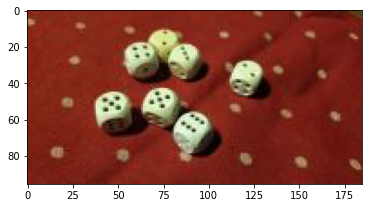

In [15]:
im = io.imread('d_r.jpg')
bw = r2g(im)
plt.imshow(im)
hsv = r2h(im)

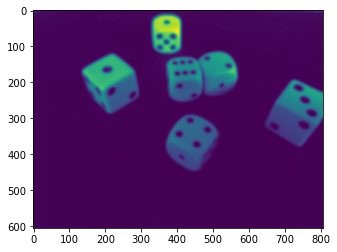

In [6]:
imb = gaussian(bw, 3)
plt.imshow(imb)

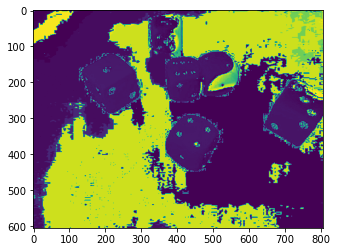

In [7]:
plt.imshow(hsv[:,:,0])

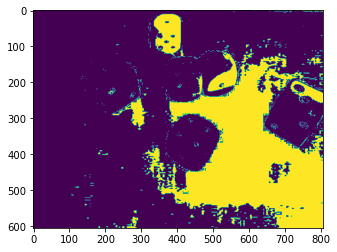

In [8]:
im2 = bw.copy()
t1 = 0.2
im2[hsv[:,:,1] < t1] = 1
im2[hsv[:,:,1] >= t1] = 0
plt.imshow(im2)

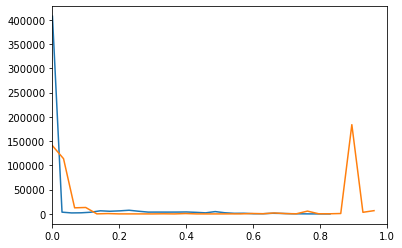

In [9]:
hi, be = np.histogram(bw, bins=30)
#f, ax = plt.subplots()
plt.xlim(0, 1)
plt.plot(be[:-1], hi)
hi, be = np.histogram(r2h(im)[:,:,0], bins=30)
plt.plot(be[:-1], hi)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


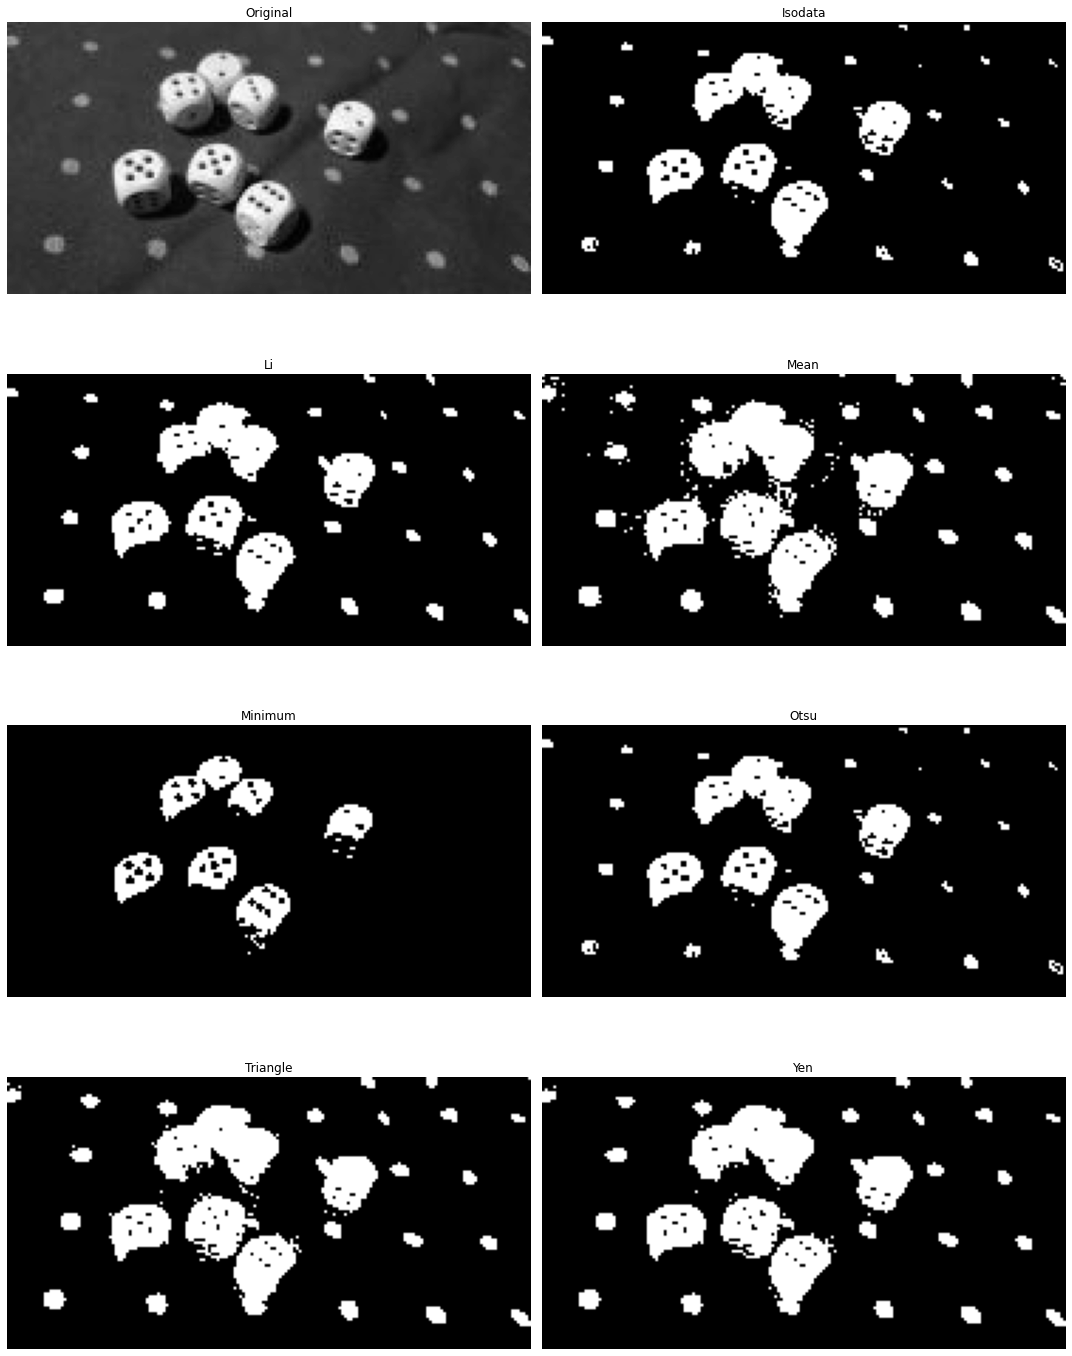

In [16]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(bw, figsize=(15,20))
plt.show()

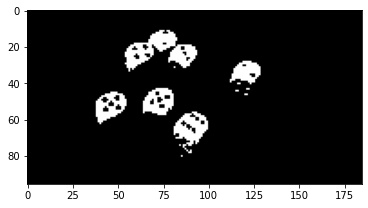

In [18]:
from skimage.filters import threshold_minimum as tm

th = tm(bw)
tt = bw > th
sh(tt)

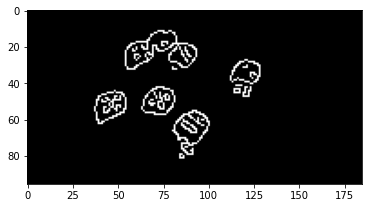

In [20]:
c = canny(tt)
sh(c)

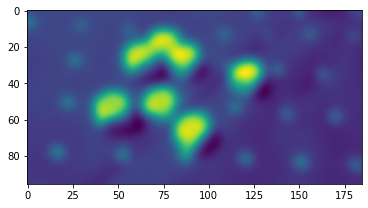

In [27]:
plt.imshow(gaussian(bw, 3))

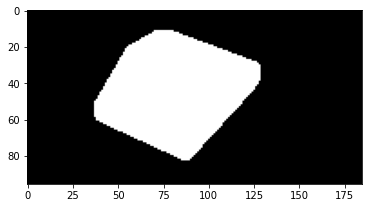

In [29]:
sh(conhu(canny(gaussian(bw, 3))))

In [17]:
@interact(a=3, t=(0, 20, 1))
def bl(a, t=1):
    g = gaussian(bw, a)
    c = canny(g)
    lb = label(c)
    f, ax = plt.subplots()
    i=0
    iw, ih = bw.shape
    mask = np.zeros_like(bw)
    j = im.copy()
    sth = iw*ih*t/1000
    rp = regionprops(lb)
    rp2 = list(filter(lambda r: bb_ar(r.bbox) > sth, rp))
    lr = len(rp2)
    f.set_size_inches((20, int(20*lr/10)))
    for r in rp2:
        x, w, h = bbxywh(r.bbox)
        asp = w/h
        asp_th = 1.5
#         if asp < 1/asp_th or asp > asp_th:
#             continue
       
        #a2.text(50, 50, str(sd))
        
        #sh(ch, next(ac))
        
        #mask[x[1]:x[1]+h, x[0]:x[0]+w] = ch
        
        regbound(r, ax)
        i+=1
#     sh(c, ax=ax)
    #j[1-mask]=[0, 0, 0]
    ax.imshow(c)
    

interactive(children=(IntSlider(value=3, description='a', max=9, min=-3), IntSlider(value=1, description='t', …

In [14]:
@interact(a=5, t=(0, 10, 1))
def bl(a, t=1):
    g = gaussian(bw, a)
    c = canny(g)
    lb = label(c)
    #co = fc(c)
    #print(co)
    #f, ax = plt.subplots()
    #f1, ac = colax(6, 3)
    #ax = next(ac)
    i=0
    iw, ih = bw.shape
    mask = np.zeros_like(bw)
    j = im.copy()
    sth = iw*ih*t/1000
    rp = regionprops(lb)
    rp2 = list(filter(lambda r: bb_ar(r.bbox) > sth, rp))
    lr = len(rp2)
    f, ac = colax(lr, 2)
    f.set_size_inches((20, int(20*lr/10)))
    for r in rp2:
        x, w, h = bbxywh(r.bbox)
        asp = w/h
        asp_th = 1.5
        if w*h < t/1000*iw*ih:
            continue
#         if asp < 1/asp_th or asp > asp_th:
#             continue
        subi = c[x[1]:x[1]+h, x[0]:x[0]+w]
        ch = conhu(subi)
        subc = im[x[1]:x[1]+h, x[0]:x[0]+w]
        #next(ac).imshow(subc)
        
        a2 = next(ac)
        a2.set_xlim(0, 1)
        hsv = r2h(subc)
        sh(hsv[:,:,1]*ch, next(ac))
        h = hsv[:,:,0]*ch
        hi, be = np.histogram(h, density=True, bins=50)
        a2.plot(be[:-1], hi)
        hi, be = np.histogram(hsv[:,:,1]*ch, density=True, bins=50)
        a2.plot(be[:-1], hi)
        sd = np.std(h)
        print(i, sd)
        #a2.text(50, 50, str(sd))
        
        #sh(ch, next(ac))
        
        #mask[x[1]:x[1]+h, x[0]:x[0]+w] = ch
        
        #regbound(r, ax)
        i+=1
#     sh(c, ax=ax)
    #j[1-mask]=[0, 0, 0]
    #ax.imshow(mask)
    

interactive(children=(IntSlider(value=5, description='a', max=15, min=-5), IntSlider(value=1, description='t',…